## Final Project Submission

Please fill out:
* Student name: Harrison Gu
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Yish Lim

#### Business question: We are running a construction company and would like to determine how to build houses that sell at a higher price.


### Scrubbing
Import necessary libraries

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

Investigate the data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Check to see if any houses appear more than once. If so, remove duplicates.

In [4]:
df[df.duplicated(subset='id', keep=False)==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [5]:
df.drop_duplicates(subset='id', keep='first', inplace=True, ignore_index=True)

In [6]:
df[df.duplicated(subset='id', keep='first')==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Drop unnecessary columns. Features that are time related ('date', 'yr_renovated', etc) are not useful to us because we can only build homes starting from tomorrow. Likewise, 'condition' and 'grade' will also be removed because we are only building new homes, and will do so at the highest quality that we can. We removed 'lat', and 'long' because these tell similar information to 'zipcode'.

In [7]:
df.drop(columns=['id','date','condition','grade','yr_built','yr_renovated', 'lat', 'long'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21420 non-null  float64
 1   bedrooms       21420 non-null  int64  
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  int64  
 4   sqft_lot       21420 non-null  int64  
 5   floors         21420 non-null  float64
 6   waterfront     19067 non-null  float64
 7   view           21357 non-null  float64
 8   sqft_above     21420 non-null  int64  
 9   sqft_basement  21420 non-null  object 
 10  zipcode        21420 non-null  int64  
 11  sqft_living15  21420 non-null  int64  
 12  sqft_lot15     21420 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


Couldn't find a way to replace the null entries in 'view' and 'waterfront' columns since they are binary and there is no way of knowing what should be there. We will drop those rows, as it still leaves us ~90% of the data to work with.

In [9]:
df.dropna(subset=['view'], inplace=True)

In [10]:
df.dropna(subset=['waterfront'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19010 non-null  float64
 1   bedrooms       19010 non-null  int64  
 2   bathrooms      19010 non-null  float64
 3   sqft_living    19010 non-null  int64  
 4   sqft_lot       19010 non-null  int64  
 5   floors         19010 non-null  float64
 6   waterfront     19010 non-null  float64
 7   view           19010 non-null  float64
 8   sqft_above     19010 non-null  int64  
 9   sqft_basement  19010 non-null  object 
 10  zipcode        19010 non-null  int64  
 11  sqft_living15  19010 non-null  int64  
 12  sqft_lot15     19010 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.0+ MB


Investigate 'sqft_basement column' because it should be a float but is currently an object.

In [11]:
df['sqft_basement'].value_counts()

0.0       11282
?           413
600.0       189
500.0       185
700.0       184
          ...  
1852.0        1
602.0         1
2570.0        1
1481.0        1
1930.0        1
Name: sqft_basement, Length: 297, dtype: int64

Looks like there are some rows with '?' as entries. We will change these to '0.0' for now so we can convert the column to float.

In [12]:
df.loc[df['sqft_basement']=='?', ['sqft_basement']] = '0.0'
df['sqft_basement'].value_counts()

0.0       11695
600.0       189
500.0       185
700.0       184
800.0       171
          ...  
1852.0        1
602.0         1
2570.0        1
1481.0        1
1930.0        1
Name: sqft_basement, Length: 296, dtype: int64

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19010 non-null  float64
 1   bedrooms       19010 non-null  int64  
 2   bathrooms      19010 non-null  float64
 3   sqft_living    19010 non-null  int64  
 4   sqft_lot       19010 non-null  int64  
 5   floors         19010 non-null  float64
 6   waterfront     19010 non-null  float64
 7   view           19010 non-null  float64
 8   sqft_above     19010 non-null  int64  
 9   sqft_basement  19010 non-null  float64
 10  zipcode        19010 non-null  int64  
 11  sqft_living15  19010 non-null  int64  
 12  sqft_lot15     19010 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.0 MB


We noticed that sqft_living = sqft_above + sqft_basement. Because these columns are correlated, we will get rid of 'sqft_above' and 'sqft_basement'. Instead, we will have a binary column 'basement' to show whether or not the house has a basement.

In [15]:
df['sqft_living'].value_counts()

1300    124
1440    121
1400    117
1820    117
1660    113
       ... 
7220      1
1095      1
3206      1
1159      1
2031      1
Name: sqft_living, Length: 991, dtype: int64

In [16]:
df['sqft_above'].value_counts()

1300    192
1010    179
1200    171
1060    166
1220    164
       ... 
3266      1
3362      1
1347      1
809       1
2031      1
Name: sqft_above, Length: 903, dtype: int64

In [17]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [18]:
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,basement
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,400,98125,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,0,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,910,98136,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,0,98074,1800,7503,0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3890,1530,98053,4760,101930,1


In [19]:
df.drop(columns=['sqft_basement', 'sqft_above'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19010 non-null  float64
 1   bedrooms       19010 non-null  int64  
 2   bathrooms      19010 non-null  float64
 3   sqft_living    19010 non-null  int64  
 4   sqft_lot       19010 non-null  int64  
 5   floors         19010 non-null  float64
 6   waterfront     19010 non-null  float64
 7   view           19010 non-null  float64
 8   zipcode        19010 non-null  int64  
 9   sqft_living15  19010 non-null  int64  
 10  sqft_lot15     19010 non-null  int64  
 11  basement       19010 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 1.8 MB


### Functions 

Run OLS model and KFold cross validation tests. Print homoscedasticity and QQ plots.

In [20]:
def run_model(data):
    x = data.drop('price', axis=1)
    y = data['price']
    linreg = LinearRegression()
    crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 1)
    mean_r2 = np.mean(cross_val_score(linreg, x, y, scoring='r2', cv=crossvalidation))
    mse = np.mean(cross_val_score(linreg, x, y, scoring='neg_mean_squared_error', cv=crossvalidation))*-1
    rmse = np.sqrt(mse)
    
    x_cols = data.drop('price', axis=1).columns
    y_col = 'price'
    plus = '+'.join(x_cols)
    formula = y_col + '~' + plus
    model = ols(formula=formula, data=data).fit()
    print('The mean r^2 for a KFold test with 10 splits is {} \n'.format(mean_r2))
    print('The mean RMSE for a KFold test with 10 splits is {} \n'.format(rmse))
    print(model.summary())
    
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(15,8))
    plt.scatter(model.predict(x), residuals)
    plt.plot(model.predict(x), [np.mean(residuals) for i in range(len(data))])
    ax.set_title('Homoscedasticity')
    plt.show()
    print('\n')
    
    fig, ax = plt.subplots(figsize=(15,8))
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
    ax.set_title('QQ Plot')
    plt.show()

Heatmap to check multicollinearity

In [21]:
def heatmap(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, cmap='Reds', annot=True, ax=ax);

Remove outliers

In [127]:
def outliers(features, data):
    for feat in features:
        mu = np.mean(data[feat])
        std = np.std(data[feat])
        outlier = 3*std
        data = data[(data[feat] <= mu+outlier) & (data[feat] >= mu-outlier)]
    return data

Log transform features

In [152]:
def log_transform(features, data):
    for feat in features:
        data[feat] = data[feat].map(lambda x: np.log(x))
    return data

Scale features using min max method

In [22]:
def scale(feature):
    return (feature-feature.min())/(feature.max()-feature.min())

Split features, one hot encode/scale. Returns concat dataframe.

In [ ]:
def scale_ohe(ohe_feature, data):
    ohe = pd.get_dummies(data[ohe_feature], prefix=ohe_feature, drop_first=True)
    no_ohe = data.drop(ohe_feature, axis=1)
    no_ohe.apply(scale)
    return pd.concat([no_ohe, ohe], axis=1)

### Baseline Model

The mean r^2 for a KFold test with 10 splits is 0.5689767766179151 

The mean RMSE for a KFold test with 10 splits is 242999.2627834107 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2333.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:00:14   Log-Likelihood:            -2.6266e+05
No. Observations:               19010   AIC:                         5.253e+05
Df Residuals:                   18998   BIC:                         5.254e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025   

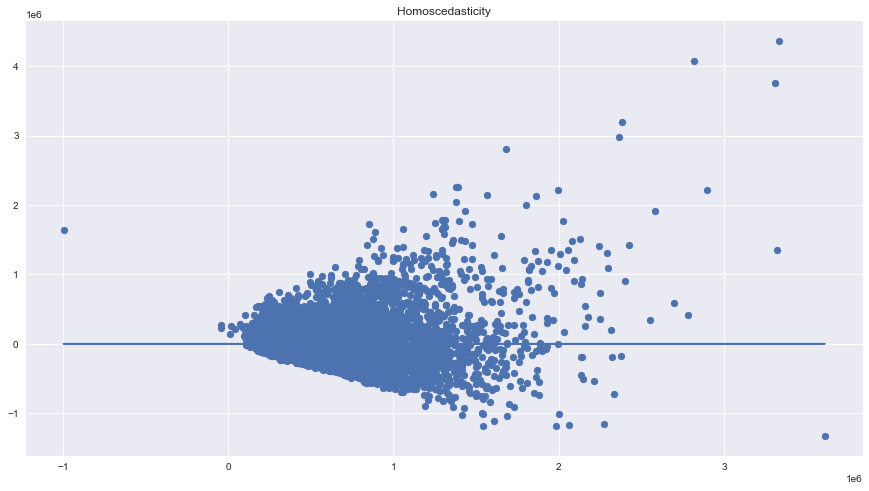

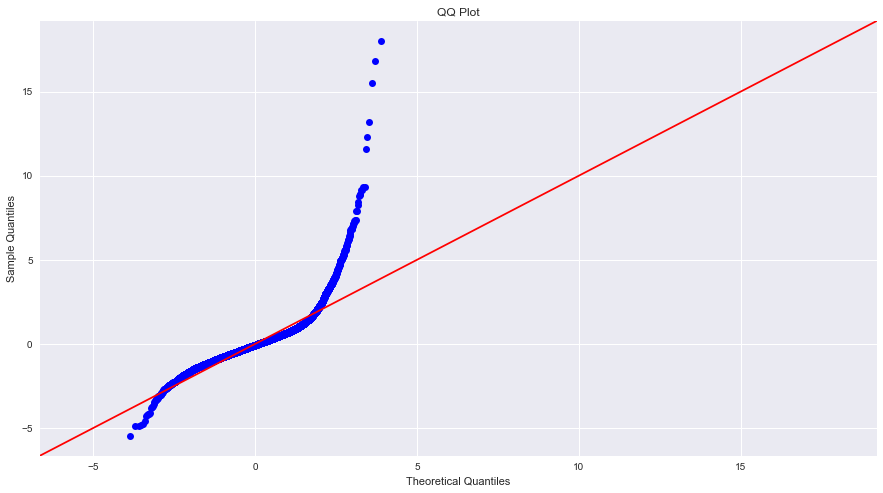

In [24]:
run_model(df)

#### Interpretation
-r^2 of 0.575 implying 57.5% of the data is explained by our model

-OLS model and KFold cross validation give similar r^2. The model does not have heavy biases.

-p value for 'bathrooms' and 'sqft_lot' are not significant. Could be caused by high correlation with other variables

-skew of 2.61 and kurtosis of 28.311 implies heavy skew and outliers 

-homoscedasticity assumption is fulfilled

-QQ plot indicates right skew

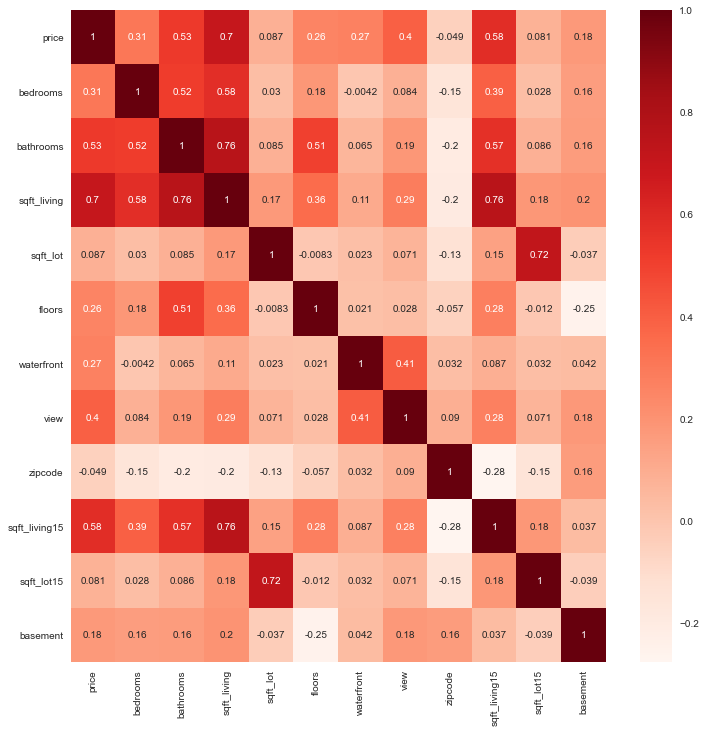

In [25]:
heatmap(df)

Heat map shows that 'sqft_living' is highly correlated with 'sqft_living15'. The correlation is barely above the 0.75 threshold, so we will leave those features in for now.

### Iteration 1: Remove outliers from dataset

Use 3 standard deviations away from mean to define outlier

In [128]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'floors']
df_no_outlier = outliers(continuous, df)
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17695 entries, 1 to 21419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17695 non-null  float64
 1   bedrooms       17695 non-null  int64  
 2   bathrooms      17695 non-null  float64
 3   sqft_living    17695 non-null  int64  
 4   sqft_lot       17695 non-null  int64  
 5   floors         17695 non-null  float64
 6   waterfront     17695 non-null  float64
 7   view           17695 non-null  float64
 8   zipcode        17695 non-null  int64  
 9   sqft_living15  17695 non-null  int64  
 10  sqft_lot15     17695 non-null  int64  
 11  basement       17695 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 1.7 MB


1315 data points removed due to outliers

The mean r^2 for a KFold test with 10 splits is 0.4713383724788759 

The mean RMSE for a KFold test with 10 splits is 179967.1764073901 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1442.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:26:56   Log-Likelihood:            -2.3921e+05
No. Observations:               17695   AIC:                         4.784e+05
Df Residuals:                   17683   BIC:                         4.785e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025   

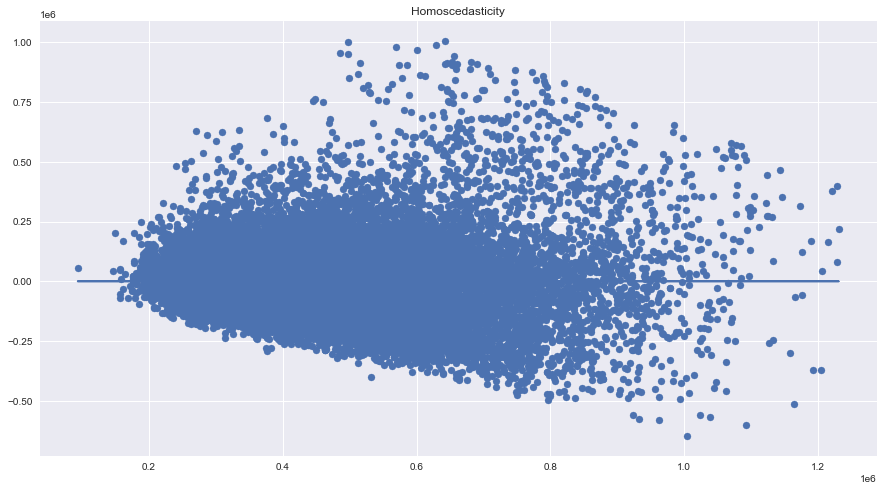

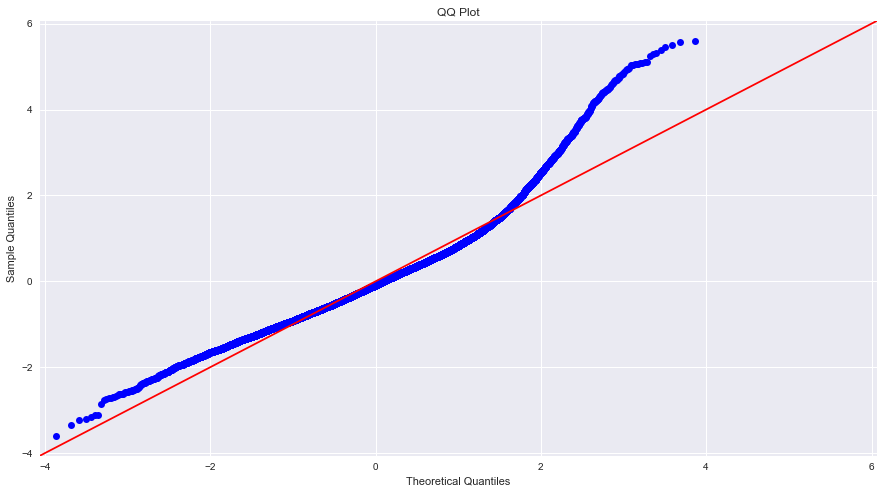

In [129]:
run_model(df_no_outlier)

#### Interpretation
-r^2 decreased by 15%

-skew is 1.005 and kurtosis is 5.655. Big improvement from baseline model. Skewness is moderately positive. Kurtosis still implies that the data is leptokurtic, which means heavy tails.

-RMSE decreased by 25% which means the residuals are smaller

-p values for 'bathrooms', and 'sqft_lot' are still insignificant

-QQ plot looks a lot closer to 'normal' after removing outliers, but still shows a right skew

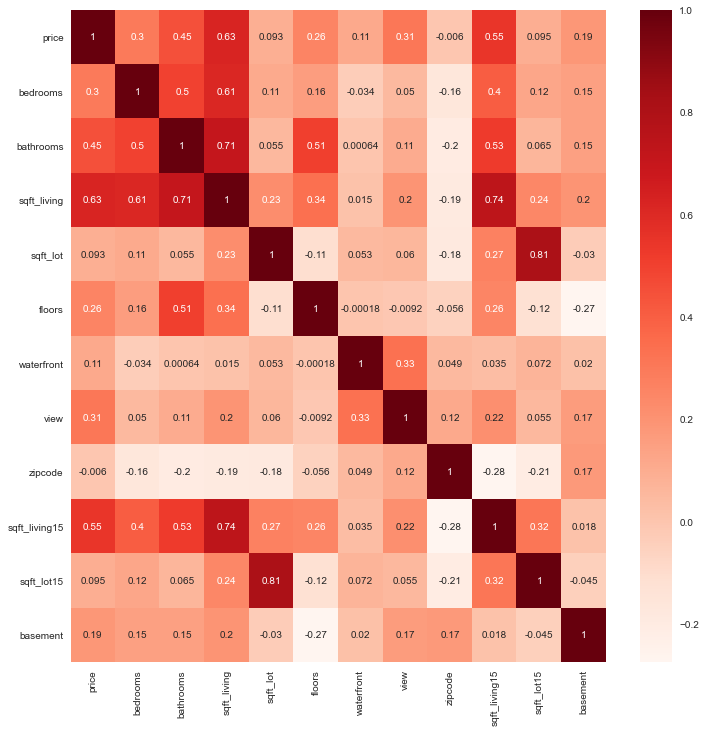

In [130]:
heatmap(df_no_outlier)

High correlations between 'sqft_living' and 'sqft_living15' have been removed, but now we see high correlation between 'sqft_lot15' and 'sqft_lot'.

### Iteration 2: Log transform features

Investigate current distribution of continuous features.

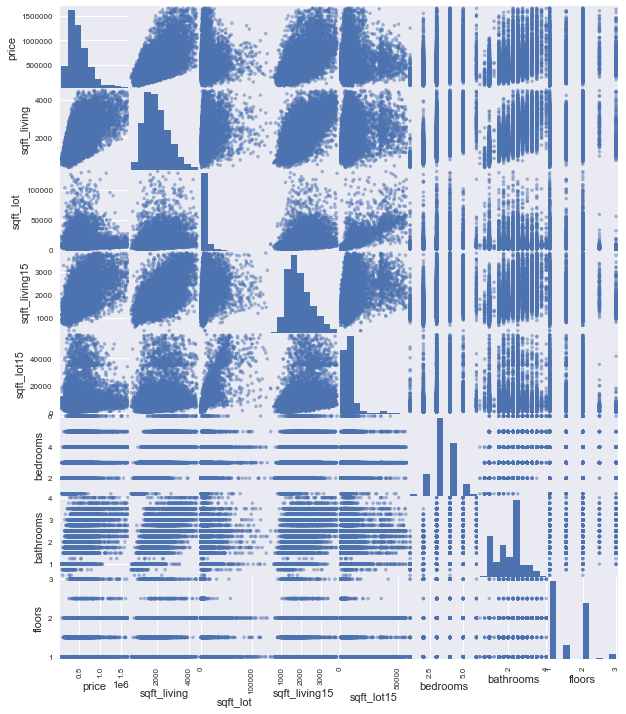

In [131]:
pd.plotting.scatter_matrix(df_no_outlier[continuous], figsize=(10, 12));

It looks like only the 'bedrooms' feature is even close to being normally distributed. We will now log transform these features to improve normality.

In [133]:
normalize = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms']

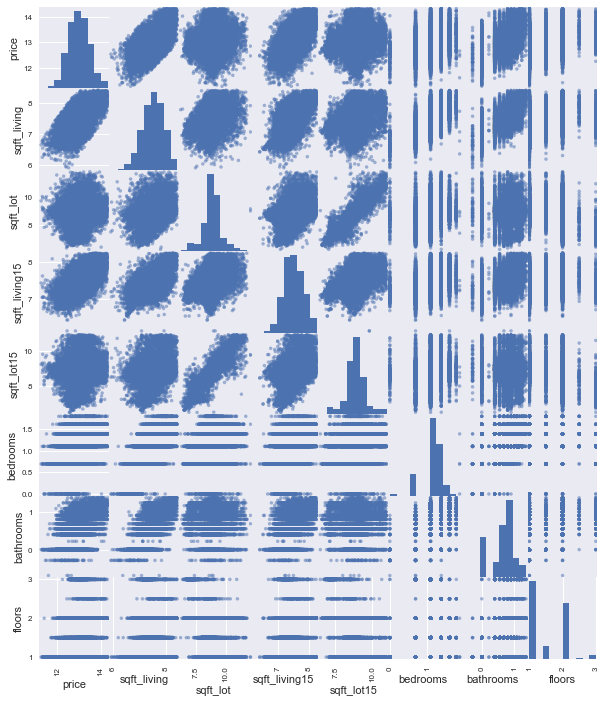

In [178]:
df_log = log_transform(normalize, df_no_outlier)
pd.plotting.scatter_matrix(df_log[continuous], figsize=(10, 12));

The mean r^2 for a KFold test with 10 splits is 0.4706684407754175 

The mean RMSE for a KFold test with 10 splits is 0.34453985100728884 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1435.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:28:15   Log-Likelihood:                -6239.0
No. Observations:               17695   AIC:                         1.250e+04
Df Residuals:                   17683   BIC:                         1.260e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025 

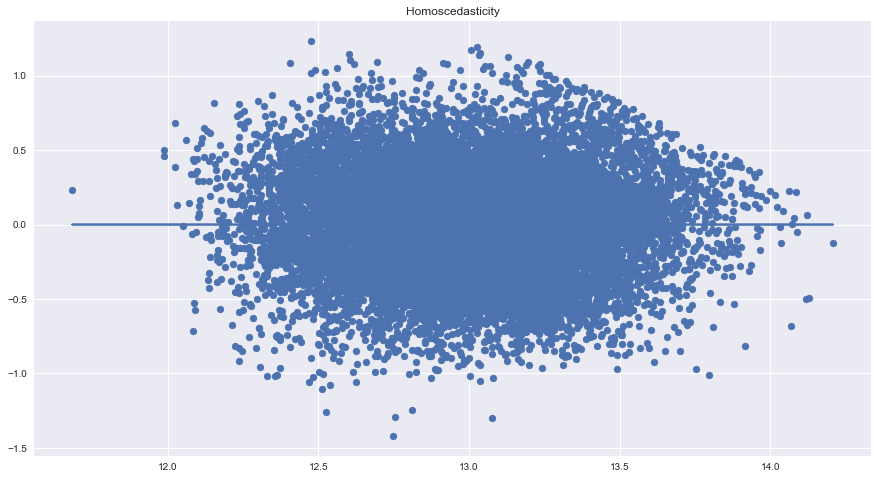

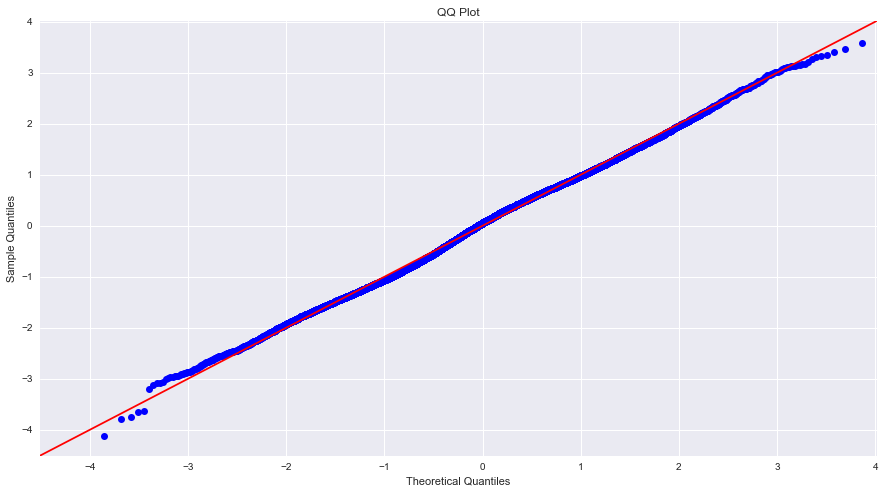

In [135]:
run_model(df_log)

#### Interpretation

-r^2 remained the same as previous model

-Skew and kurtosis are now also in acceptable ranges 

-QQ plot now shows that the data is normally distributed

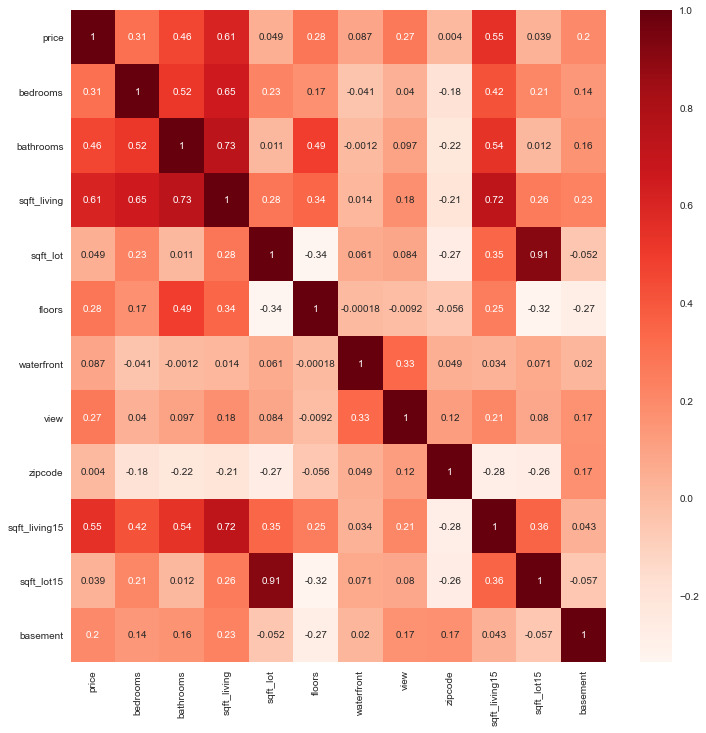

In [136]:
heatmap(df_log)

Correlation between 'sqft_lot15' and 'sqft_lot' is now even higher. We will try min-max scaling all the features. If this does not fix the issue, we will have to remove one of the features.

### Iteration 3: Min-max scale and one hot encode

One hot encode 'zipcode' and scale all other features.

In [179]:
df_scale = scale_ohe('zipcode', df_log)

The mean r^2 for a KFold test with 10 splits is 0.84465485620787 

The mean RMSE for a KFold test with 10 splits is 0.1866378169622962 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1228.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:56:11   Log-Likelihood:                 4687.0
No. Observations:               17695   AIC:                            -9214.
Df Residuals:                   17615   BIC:                            -8591.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025    

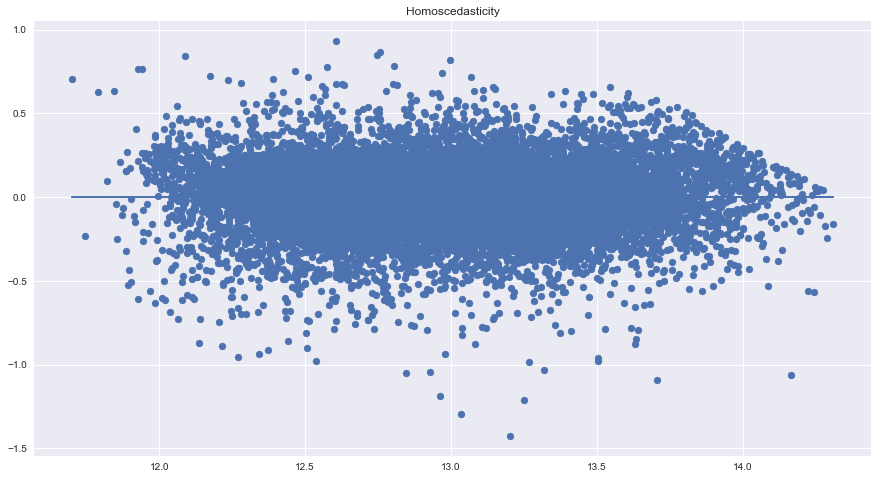

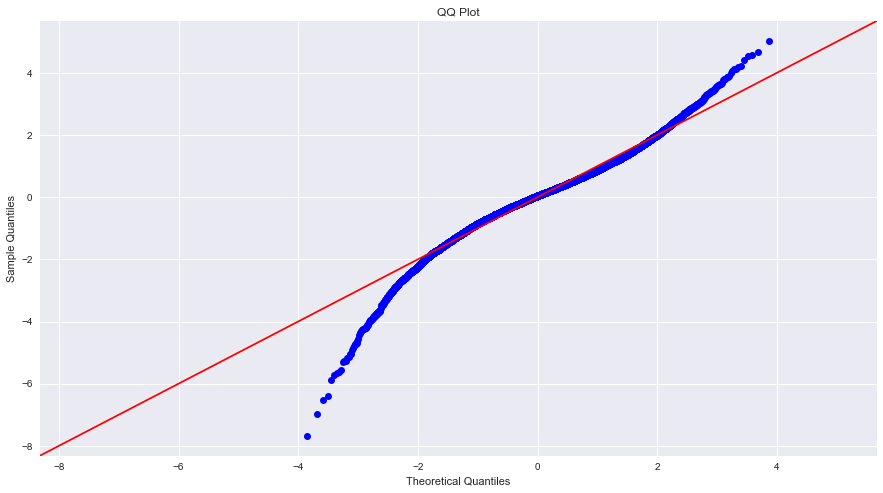

In [180]:
run_model(df_scale)

#### Interpretation

-r^2 drastically improved, increasing by 78% from our previous model, and 48% from our baseline model

-skew became slightly negative and kurtotis increased, but still acceptable

-still no improvement in significance for certain features. Will remove features with insignificant p values

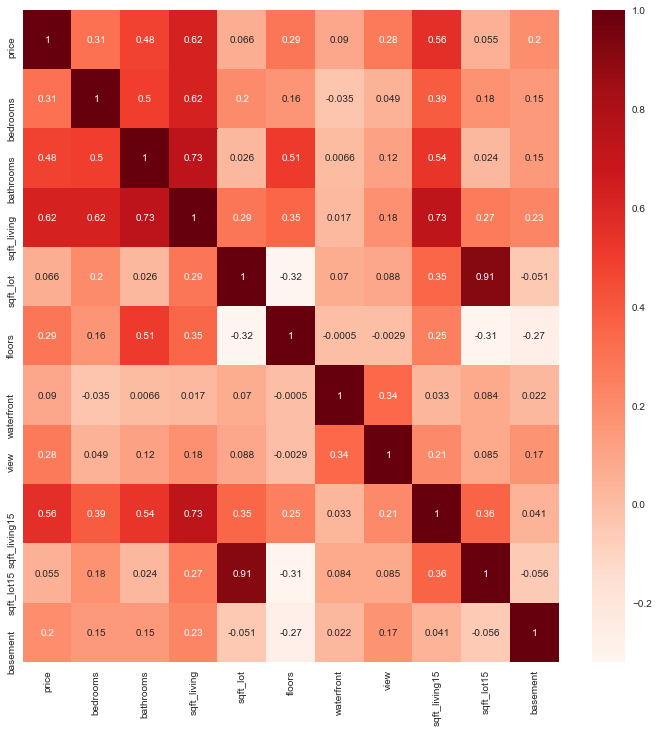

In [140]:
heatmap(no_zip)

'sqft_lot15' and 'sqft_lot' are still highly correlated. Will remove 'sqft_lot15' as it is also the one with high p value.

### Iteration 4: Remove high p-values

In [181]:
df_no_pval = df_scale.drop(['sqft_lot15', 'zipcode_98002', 'zipcode_98023', 'zipcode_98032'], axis=1)

The mean r^2 for a KFold test with 10 splits is 0.844714520165194 

The mean RMSE for a KFold test with 10 splits is 0.18660163586541728 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1294.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:57:45   Log-Likelihood:                 4686.3
No. Observations:               17695   AIC:                            -9221.
Df Residuals:                   17619   BIC:                            -8629.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025  

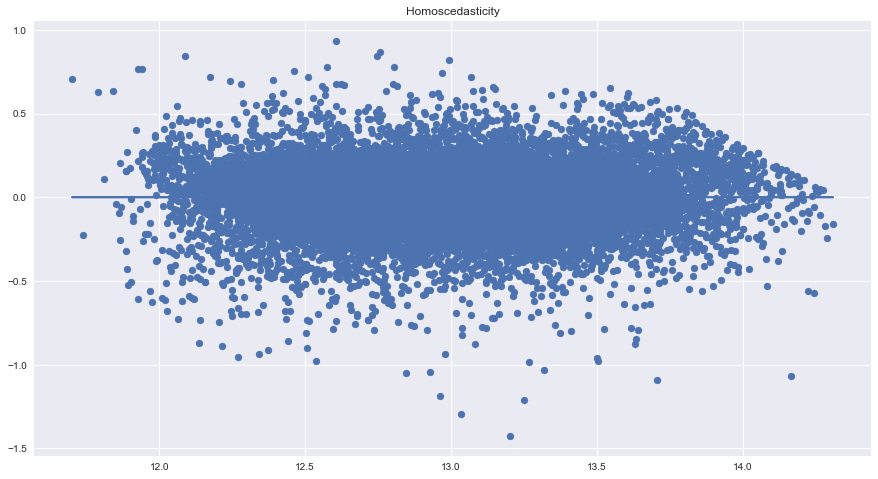

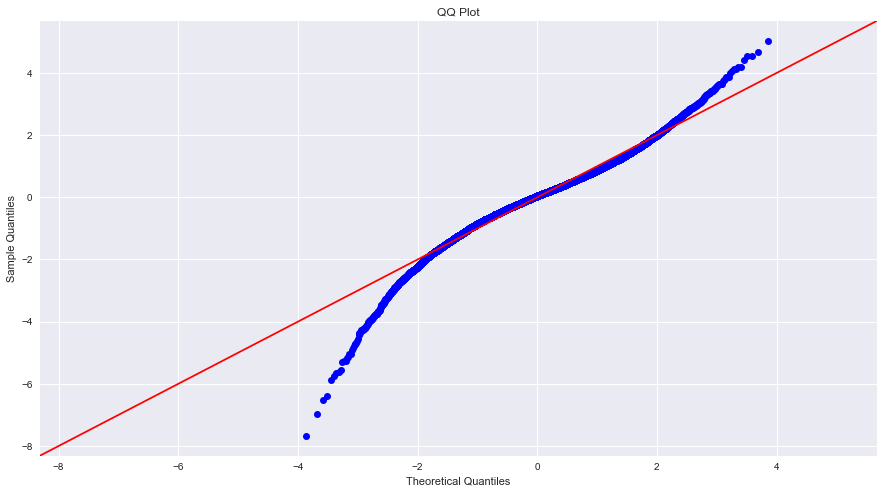

In [182]:
run_model(df_no_pval)

#### Interpretation

-Removing 'sqft_lot15' slightly improved the p value of 'floors'.

### Iteration 5: Identify and address interactions between features (final model)

In [44]:
df_interactions = df_no_pval.copy()

In [46]:
x = df_interactions.drop('price', axis=1)
y = df_interactions['price']
baseline = .848

In [47]:
interactions = []

feat_combinations = combinations(x.columns, 2)

data = x.copy()
linreg = LinearRegression()
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 1)

for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
Top 3 interactions: [('sqft_living', 'floors', 0.85), ('bathrooms', 'sqft_living', 0.848), ('floors', 'sqft_living15', 0.848)]


In [52]:
df_interactions['sqft_living*floors'] = df_interactions['sqft_living']*df_interactions['floors']

The mean r^2 for a KFold test with 10 splits is 0.8495874751631691 

The mean RMSE for a KFold test with 10 splits is 0.060767726751095416 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1354.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:06:39   Log-Likelihood:                 25047.
No. Observations:               18064   AIC:                        -4.994e+04
Df Residuals:                   17987   BIC:                        -4.934e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [

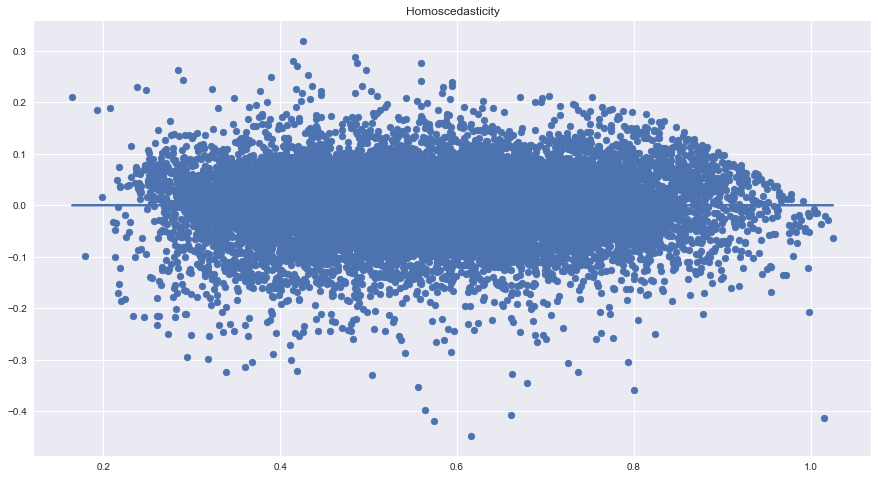

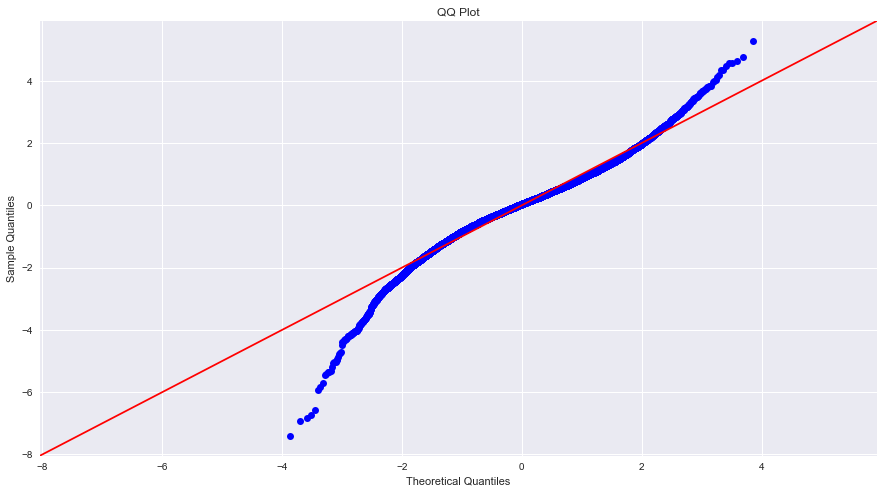

In [60]:
run_model(df_interactions)

Addressing the interaction between 'sqft_living' and 'floors' improved our r^2 by 0.4%. Not much, but we'll take it.

### Train Test Split

In [165]:
df_tts = df.copy()

In [166]:
x = df_tts.drop('price', axis=1)
y = df_tts['price']

Split original data into training data (80%) and testing data (20%).

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

Concat x with y to remove outliers

In [168]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
len(train)

15208

Remove outliers separately

In [169]:
train1 = outliers(continuous, train)
test1 = outliers(continuous, test)
len(train1)

14133

Log transform train and test splits

In [170]:
train2 = log_transform(normalize, train1)
test2 = log_transform(normalize, test1)

Scale and OHE training and testing data separately

In [171]:
train_preprocessed = scale_ohe('zipcode', train2)

test_preprocessed = scale_ohe('zipcode', test2)

Drop features determined by our final model

In [172]:
train_preprocessed.drop(['sqft_lot15', 'zipcode_98002', 'zipcode_98023', 'zipcode_98032'], axis=1, inplace=True)
test_preprocessed.drop(['sqft_lot15', 'zipcode_98002', 'zipcode_98023', 'zipcode_98032'], axis=1, inplace=True)

Apply interactions determmined by our final model

In [173]:
train_preprocessed['sqft_living*floors'] = train_preprocessed['sqft_living']*train_preprocessed['floors']
test_preprocessed['sqft_living*floors'] = test_preprocessed['sqft_living']*test_preprocessed['floors']

Check to see that the training and testing sets are split correctly

In [174]:
x_train_preprocessed = train_preprocessed.drop('price', axis=1)
y_train_preprocessed = train_preprocessed['price']

x_test_preprocessed = test_preprocessed.drop('price', axis=1)
y_test_preprocessed = test_preprocessed['price']

In [176]:
print(len(x_train_preprocessed), len(x_test_preprocessed), len(y_train_preprocessed), len(y_test_preprocessed))

14133 3495 14133 3495


Run testing data through training model

In [177]:
linreg.fit(x_train_preprocessed, y_train_preprocessed)
y_hat_test = linreg.predict(x_test_preprocessed)

test_mse = mean_squared_error(y_test_preprocessed, y_hat_test)
test_mse

0.03438263540831402

#### Interpretation

The test MSE is very small, which implies that the model does not have heavy biases.